In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-movies-dataset/merged_dataset.csv


In [2]:
import seaborn as sns
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
df= pd.read_csv("/kaggle/input/imdb-movies-dataset/merged_dataset.csv")
df.head()

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews
0,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820
1,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365
2,The Lord of the Rings: The Return of the King,2003,PG-13,3h 21min,Adventure; Drama; Fantasy;,17 December 2003 (USA),8.9,1593859,3681
3,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979
4,The Lord of the Rings: The Two Towers,2002,PG-13,2h 59min,Adventure; Drama; Fantasy;,18 December 2002 (USA),8.7,1440188,2559


In [4]:
df.tail()

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews
1495,Catch-22,1970,R,2h 2min,Comedy; Drama; War;,24 June 1970 (USA),7.1,21424,145
1496,The Great Raid,2005,R,2h 12min,Action; Drama; War;,12 August 2005 (USA),6.7,20965,194
1497,Saints and Soldiers,2003,PG-13,1h 30min,Action; Drama; War;,25 March 2005 (USA),6.7,19730,163
1498,Stop-Loss,2008,R,1h 52min,Drama; War;,28 March 2008 (USA),6.4,19456,102
1499,The Alamo,2004,PG-13,2h 17min,Drama; History; War;,9 April 2004 (USA),6.0,19290,306


In [5]:
df=df.drop(["movie_rated","genres","release_date","name"],axis=1)

In [6]:
df.shape

(1500, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1500 non-null   int64  
 1   run_length   1500 non-null   object 
 2   rating       1500 non-null   float64
 3   num_raters   1500 non-null   int64  
 4   num_reviews  1500 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 58.7+ KB


In [8]:
df["rating"].value_counts

<bound method IndexOpsMixin.value_counts of 0       8.8
1       8.8
2       8.9
3       8.4
4       8.7
       ... 
1495    7.1
1496    6.7
1497    6.7
1498    6.4
1499    6.0
Name: rating, Length: 1500, dtype: float64>

<Axes: xlabel='rating', ylabel='count'>

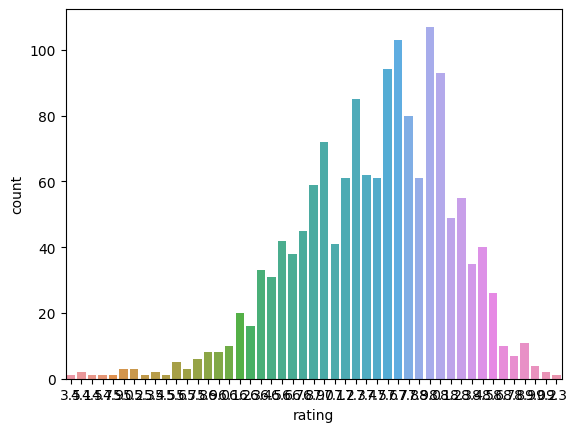

In [9]:
sns.countplot(x="rating",data=df)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1500.0,2002.632000,14.758516,1915.0,1998.00,2006.0,2012.00,2020.0
rating,1500.0,7.477600,0.725035,3.5,7.00,7.6,8.00,9.3
num_raters,1500.0,411674.587333,318168.620883,19290.0,191244.50,341452.0,565403.00,2258845.0
num_reviews,1500.0,996.054667,1009.968589,102.0,424.75,724.5,1223.25,10279.0


In [11]:
def convert_to_minutes(time_str):
    hours = re.search(r'(\d+)h', time_str)  # Saat değerini bul
    minutes = re.search(r'(\d+)min', time_str)  # Dakika değerini bul

    # Saat ve dakikayı hesapla
    total_minutes = (int(hours.group(1)) * 60 if hours else 0) + (int(minutes.group(1)) if minutes else 0)
    return total_minutes

# Uygulama
df['run_length'] = df['run_length'].apply(convert_to_minutes)

<Axes: >

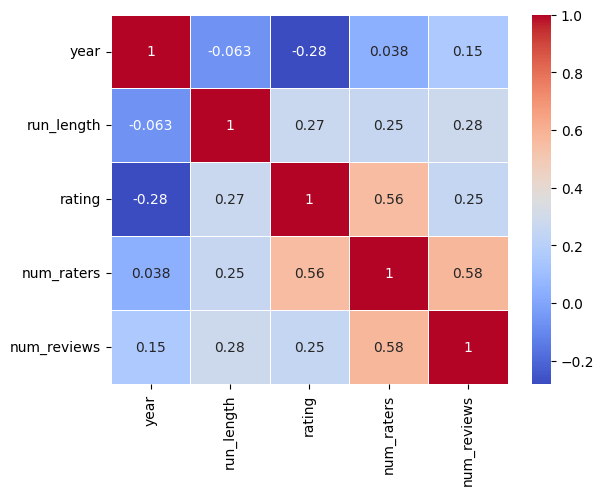

In [12]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)


<Axes: >

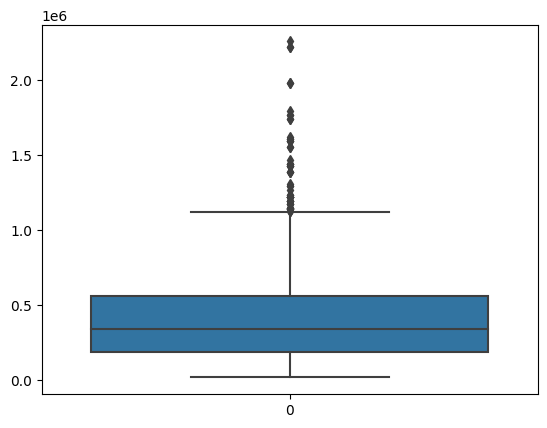

In [13]:
sns.boxplot(df["num_raters"])



<Axes: >

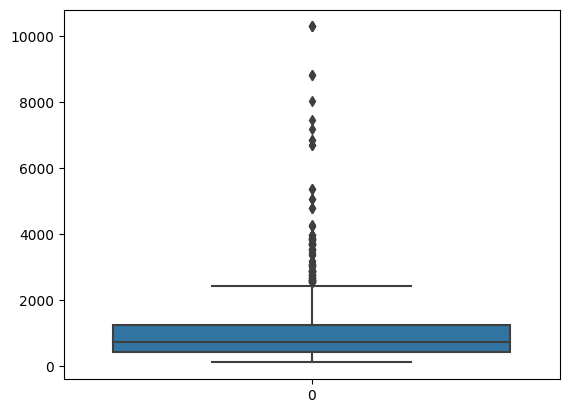

In [14]:
sns.boxplot(df["num_reviews"])


<Axes: xlabel='num_reviews', ylabel='num_raters'>

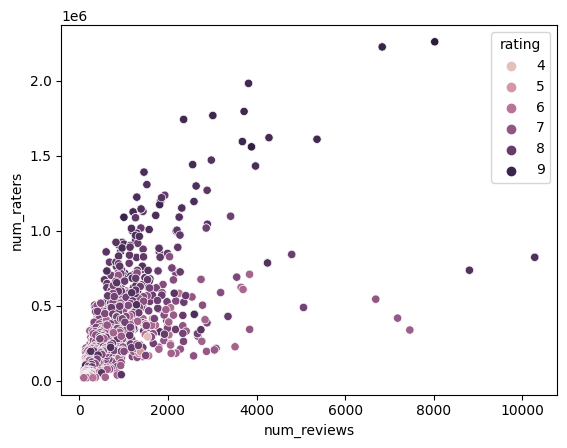

In [15]:
sns.scatterplot(x="num_reviews" , y="num_raters",hue="rating", data=df)

In [16]:
df.isnull().sum()

year           0
run_length     0
rating         0
num_raters     0
num_reviews    0
dtype: int64

In [17]:
df.head(3)

,year,run_length,rating,num_raters,num_reviews
0,2010,148,8.8,1981675,3820
1,2001,178,8.8,1609165,5365
2,2003,201,8.9,1593859,3681


In [18]:
x=df.drop(["rating"],axis=1)
y=df["rating"]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=36)

In [20]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)



In [21]:
from xgboost import XGBRegressor
XGBoostRegressor= XGBoostRegressor = XGBRegressor(n_estimators=800, learning_rate=0.01, max_depth=50, subsample=0.8, colsample_bytree=0.8)


In [22]:

XGBoostRegressor.fit(x_train, y_train)
xgb_predictions = XGBoostRegressor.predict(x_test)
r2_percentage = r2_score(y_test, xgb_predictions) * 100
print("XGBoost Regressor:")
print("MSE:", mean_squared_error(y_test, xgb_predictions))
print("R2 Score: {:.2f}%".format(r2_percentage))
print()

XGBoost Regressor:
MSE: 0.1680725159254574
R2 Score: 61.83%



In [23]:
datas = pd.DataFrame({"predictions": xgb_predictions, "Real value": y_test})
print(datas)

      predictions  Real value
589      8.499863         8.5
162      7.132419         7.9
900      8.471533         8.5
171      7.336599         7.7
688      7.436744         6.8
...           ...         ...
308      8.295585         8.3
188      7.571162         8.0
1349     7.306255         7.3
635      7.898934         7.9
880      7.470027         7.4

[375 rows x 2 columns]
